# Import necessary libraries:

In [1]:
# Define classes to contain and encapsulate data.
from dataclasses import dataclass 
import pandas as pd
# Import in-built module for generating random numbers. 
import random 
# Display output inline.
%matplotlib inline
# Import to replicate a nested loop over the input values.
from sensitivity import SensitivityAnalyzer 

# Import warnings and disable.
import warnings
warnings.filterwarnings('ignore')

## Specify Inputs:

In [4]:
# Create a DataFrame consisting of various classes using Python's 'dataclass()'
# module and Object Oriented Programming (OPP).
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    number_shares: int = 500
    buy_price: int = 10
    sell_price: int = 15    
    div_year: int = 500
    cost_year: int = 125   
    target_roi: float = 0.075

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data 

ModelInputs(number_shares=500, buy_price=10, sell_price=15, div_year=500, cost_year=125, target_roi=0.075)

# Create a function to calculate ROI for the next six years

In [21]:
# Get the ROI at a given year from the start of the model based above.

def roi_per_year(data: ModelInputs, print_output=True):
    # Start with no cash saved.
    prior_roi = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  
   
    if print_output:
        print('ROI over time:')
    while year < 6:
        year = year + 1
        # print year
        net_return = (data.sell_price - data.buy_price)\
        * data.number_shares + data.div_year - data.cost_year
        cost_of_investment = data.buy_price * data.number_shares

        roi = prior_roi + ((net_return)/(cost_of_investment))*100
        print(f'The ROI at year {year} is {roi:,.0f}%.')
        prior_roi = roi         
       
    return roi

# View output.
roi_per_year(model_data)

ROI over time:
The ROI at year 1 is 57%.
The ROI at year 2 is 114%.
The ROI at year 3 is 170%.
The ROI at year 4 is 227%.
The ROI at year 5 is 284%.
The ROI at year 6 is 341%.


340.90909090909093

In [22]:
# Function to create a DataFrame as df: 
def roi_per_year_df(data: ModelInputs):
    year = 0
    prior_roi = 0
    df_data_tups = []
    
    for year in range(6):
        year = year + 1
        
        net_return = (data.sell_price - data.buy_price)\
        * data.number_shares + data.div_year - data.cost_year
        cost_of_investment = data.buy_price * data.number_shares
        
        roi = prior_roi + ((net_return)/(cost_of_investment))*100
        # print(f'The ROI at year {year} is {roi:,.0f}%.').
        
        prior_roi = roi 
        # Save the results in a tuple for later building the DataFrame.
        df_data_tups.append((year, roi))
        # Now create the DataFrame.
        df = pd.DataFrame(df_data_tups, columns=['Year', 'ROI in %'])
        
    return df

# View the DataFrame.
roi_per_year_df(model_data)

,Year,ROI in %
0,1,56.818182
1,2,113.636364
2,3,170.454545
3,4,227.272727
4,5,284.090909
5,6,340.909091


# Develop a model to calculate Annualized ROI for each year and a single year:

In [23]:
# Function to give the annual ROI for each year. 
def annualized_roi_per_year(data: ModelInputs):
    year = 0
    prior_roi = 0

    for year in range(6):
        year = year + 1
        # print(year).
        net_return = (data.sell_price - data.buy_price)\
        * data.number_shares + data.div_year - data.cost_year
        
        cost_of_investment = data.buy_price * data.number_shares
        
        roi = prior_roi + ((net_return)/(cost_of_investment))*100 
        print(f"ROI :{roi:,.2f}%")
        
        # annual_roi = [((1 + (roi/100))**(1/year)-1)*100].
        annual_roi = ((1 + (roi/100))**(1/year)-1)*100
        print(f'The annualized ROI at year {year} is {annual_roi:,.2f}%.')
        prior_roi = roi 
        
    return annual_roi

# View the output.
annualized_roi_per_year(model_data)

ROI :56.82%
The annualized ROI at year 1 is 56.82%.
ROI :113.64%
The annualized ROI at year 2 is 46.16%.
ROI :170.45%
The annualized ROI at year 3 is 39.33%.
ROI :227.27%
The annualized ROI at year 4 is 34.50%.
ROI :284.09%
The annualized ROI at year 5 is 30.88%.
ROI :340.91%
The annualized ROI at year 6 is 28.05%.


28.053516412267054

In [24]:
# Function to return annualised ROI for a single year. 
def anl_roi_per_year(data: ModelInputs, print_output=True):
    year = 0
    prior_roi = 0
    
    if print_output:
        # \n makes a blank line in the output.
        print('Anuual ROI over time:') 
        
    while year < 6:
        year = year + 1
        net_return = (data.sell_price - data.buy_price)\
        * data.number_shares + data.div_year - data.cost_year
        
        cost_of_investment = data.buy_price * data.number_shares
        
        # Cost of investment is simply the buying price of each 
        # share multiplied by the number of shares purchased, 
        # e.g. 10 shares at $5 means the cost of investment is £50.
        roi = prior_roi + ((net_return)/(cost_of_investment))*100
        print(f"roi :{roi:.2f}%")
        
        anl_roi = ((1 + (roi/100))**(1/year)-1)*100
        
        return anl_roi
    
# View the output
anl_roi_per_year(model_data)

Anuual ROI over time:
roi :56.82%


56.818181818181834

## 5. Run the model based on some changes
 - Number of shares by 10% and decreases by 10%. 
 - Buying price per share increases by 15% and decreases by 10%. 
 - Selling price per share increases by 20% and decreases by 15%. 
 - Annual dividend increases by 25% and decreases by 20%. 

In [25]:
# Number of shares increase 10%.
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    number_shares: int = 550
    buy_price: int = 10
    sell_price: int = 15    
    div_year: int = 500
    cost_year: int = 125   
    target_roi: float = 0.075

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data
roi_per_year(model_data)

ROI over time:
The ROI at year 1 is 57%.
The ROI at year 2 is 114%.
The ROI at year 3 is 170%.
The ROI at year 4 is 227%.
The ROI at year 5 is 284%.
The ROI at year 6 is 341%.


340.90909090909093

In [26]:
# Number of shares decrease 10%.
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    number_shares: int = 450
    buy_price: int = 10
    sell_price: int = 15    
    div_year: int = 500
    cost_year: int = 125   
    target_roi: float = 0.075

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data
roi_per_year(model_data)

ROI over time:
The ROI at year 1 is 58%.
The ROI at year 2 is 117%.
The ROI at year 3 is 175%.
The ROI at year 4 is 233%.
The ROI at year 5 is 292%.
The ROI at year 6 is 350%.


350.0

In [27]:
# Buying price per share increases by 15%.
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    number_shares: int = 500
    buy_price: float = 11.50
    sell_price: int = 15    
    div_year: int = 500
    cost_year: int = 125   
    target_roi: float = 0.075

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data
roi_per_year(model_data)

ROI over time:
The ROI at year 1 is 37%.
The ROI at year 2 is 74%.
The ROI at year 3 is 111%.
The ROI at year 4 is 148%.
The ROI at year 5 is 185%.
The ROI at year 6 is 222%.


221.7391304347826

In [28]:
# Buying price per share decrease by 10%.
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    number_shares: int = 500
    buy_price: float = 9.00
    sell_price: int = 15    
    div_year: int = 500
    cost_year: int = 125   
    target_roi: float = 0.075

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data
roi_per_year(model_data)

ROI over time:
The ROI at year 1 is 75%.
The ROI at year 2 is 150%.
The ROI at year 3 is 225%.
The ROI at year 4 is 300%.
The ROI at year 5 is 375%.
The ROI at year 6 is 450%.


450.0

In [29]:
# Selling price per share increases by 20%.
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    number_shares: int = 500
    buy_price: float = 10.00
    sell_price: int = 18    
    div_year: int = 500
    cost_year: int = 125   
    target_roi: float = 0.075

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data
roi_per_year(model_data)

ROI over time:
The ROI at year 1 is 88%.
The ROI at year 2 is 175%.
The ROI at year 3 is 262%.
The ROI at year 4 is 350%.
The ROI at year 5 is 438%.
The ROI at year 6 is 525%.


525.0

In [30]:
# Selling price decreases by 15%

@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    number_shares: int = 500
    buy_price: float = 10.00
    sell_price: float = 12.75   
    div_year: int = 500
    cost_year: int = 125   
    target_roi: float = 0.075

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data
roi_per_year(model_data)

ROI over time:
The ROI at year 1 is 35%.
The ROI at year 2 is 70%.
The ROI at year 3 is 105%.
The ROI at year 4 is 140%.
The ROI at year 5 is 175%.
The ROI at year 6 is 210%.


210.0

In [31]:
# Annual dividend increases by 25%.
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    number_shares: int = 500
    buy_price: int = 10
    sell_price: int = 15    
    div_year: int = 625
    cost_year: int = 125   
    target_roi: float = 0.075

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data
roi_per_year(model_data)

ROI over time:
The ROI at year 1 is 60%.
The ROI at year 2 is 120%.
The ROI at year 3 is 180%.
The ROI at year 4 is 240%.
The ROI at year 5 is 300%.
The ROI at year 6 is 360%.


360.0

In [32]:
# Annual dividend decreases by 20%.
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    number_shares: int = 500
    buy_price: int = 10
    sell_price: int = 15    
    div_year: int = 400
    cost_year: int = 125   
    target_roi: float = 0.075

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data
roi_per_year(model_data)

ROI over time:
The ROI at year 1 is 56%.
The ROI at year 2 is 111%.
The ROI at year 3 is 167%.
The ROI at year 4 is 222%.
The ROI at year 5 is 278%.
The ROI at year 6 is 333%.


333.00000000000006

# 6. Create a 'good' and 'bad' scenario

In [37]:
# Create a good and bad scenario.
@dataclass
class ModelInputs:
    number_shares: int = 500
    buy_price: int = 10
    sell_price: int = 15    
    div_year: int = 625
    cost_year: int = 125   

        
model_data = ModelInputs()
model_data

ModelInputs(number_shares=500, buy_price=10, sell_price=15, div_year=625, cost_year=125)

In [39]:
bad_economy_data = ModelInputs(
    number_shares = 100,
    buy_price = 600,
    div_year = 200,
    sell_price = 200,
    cost_year = 900)

good_economy_data = ModelInputs(
    number_shares = 800,
    buy_price = 30,
    div_year = 600,
    sell_price= 45,
    cost_year = 100)

cases = {
    'Bad': bad_economy_data,
    # Original inputs were set to assume a normal economy.
    'Normal': model_data, 
    'Good': good_economy_data}

for case_type, case_inputs in cases.items():
    ytr = anl_roi_per_year(case_inputs, print_output=False)
    
print(f'Annualized ROI would be {ytr:.2f}% in case of {case_type} economy.')

roi :-67.83%
roi :60.00%
roi :52.08%
Annualized ROI would be 52.08% in case of Good economy.


# Perform what-if scenario.

In [40]:
# Run a what-if analysis based on these scenarios using the SenstivityAnalyzer. 
# Print out the combinations in a DataFrame. (Hint: Use the sa.plot() function.)

In [41]:
# Run a what-if analysis.
def analyzer_what_if(    
    number_shares  = 500,
    buy_price = 10,
    div_year = 500,
    sell_price = 15,
    cost_year = 125):
    data = ModelInputs(
        number_shares=number_shares, 
        buy_price=buy_price, 
        div_year=div_year, 
        sell_price=sell_price,  
        cost_year=cost_year)
    
    return annualized_roi_per_year(data)

analyzer_what_if()

ROI :57.50%
The annualized ROI at year 1 is 57.50%.
ROI :115.00%
The annualized ROI at year 2 is 46.63%.
ROI :172.50%
The annualized ROI at year 3 is 39.68%.
ROI :230.00%
The annualized ROI at year 4 is 34.78%.
ROI :287.50%
The annualized ROI at year 5 is 31.12%.
ROI :345.00%
The annualized ROI at year 6 is 28.25%.


28.25077608160358

In [42]:
# It is certainly possible to specify all these through hard-coding but 
# using list comprehensions makes it easier to adjust.
sensitivity_values = {
    'number_shares': [i * 100 for i in range(4, 8)],
    'buy_price': [i*10 for i in range(4, 8)],
    'div_year': [i *100 for i in range(1, 4)],
    'sell_price': [i *10 for i in range(10, 25, 5)],
    'cost_year': [i * 100 for i in range(3, 10)],
    # 'interest_rate': [i/100 for i in range(3, 8)],
    # 'desired_cash': [i * 100000 for i in range(10, 26, 5)]
}

sensitivity_values

{'number_shares': [400, 500, 600, 700],
 'buy_price': [40, 50, 60, 70],
 'div_year': [100, 200, 300],
 'sell_price': [100, 150, 200],
 'cost_year': [300, 400, 500, 600, 700, 800, 900]}

In [44]:
# Run the Python’s SensitivityAnalyzer with the all the assigned inputs:
sa = SensitivityAnalyzer(
    sensitivity_values,
    analyzer_what_if,
    result_name='Annual ROI',
    reverse_colors=True,
    grid_size=3)

 11%|█████████▋                                                                                 | 107/1008 [00:00<00:01, 750.33it/s]

ROI :148.75%
The annualized ROI at year 1 is 148.75%.
ROI :297.50%
The annualized ROI at year 2 is 99.37%.
ROI :446.25%
The annualized ROI at year 3 is 76.12%.
ROI :595.00%
The annualized ROI at year 4 is 62.37%.
ROI :743.75%
The annualized ROI at year 5 is 53.19%.
ROI :892.50%
The annualized ROI at year 6 is 46.60%.
ROI :148.12%
The annualized ROI at year 1 is 148.13%.
ROI :296.25%
The annualized ROI at year 2 is 99.06%.
ROI :444.38%
The annualized ROI at year 3 is 75.91%.
ROI :592.50%
The annualized ROI at year 4 is 62.22%.
ROI :740.62%
The annualized ROI at year 5 is 53.08%.
ROI :888.75%
The annualized ROI at year 6 is 46.50%.
ROI :147.50%
The annualized ROI at year 1 is 147.50%.
ROI :295.00%
The annualized ROI at year 2 is 98.75%.
ROI :442.50%
The annualized ROI at year 3 is 75.71%.
ROI :590.00%
The annualized ROI at year 4 is 62.07%.
ROI :737.50%
The annualized ROI at year 5 is 52.97%.
ROI :885.00%
The annualized ROI at year 6 is 46.41%.
ROI :146.88%
The annualized ROI at year 1 i

 27%|████████████████████████▋                                                                  | 274/1008 [00:00<00:01, 686.74it/s]

ROI :263.33%
The annualized ROI at year 4 is 38.06%.
ROI :329.17%
The annualized ROI at year 5 is 33.82%.
ROI :395.00%
The annualized ROI at year 6 is 30.55%.
ROI :65.42%
The annualized ROI at year 1 is 65.42%.
ROI :130.83%
The annualized ROI at year 2 is 51.93%.
ROI :196.25%
The annualized ROI at year 3 is 43.62%.
ROI :261.67%
The annualized ROI at year 4 is 37.90%.
ROI :327.08%
The annualized ROI at year 5 is 33.69%.
ROI :392.50%
The annualized ROI at year 6 is 30.44%.
ROI :65.00%
The annualized ROI at year 1 is 65.00%.
ROI :130.00%
The annualized ROI at year 2 is 51.66%.
ROI :195.00%
The annualized ROI at year 3 is 43.42%.
ROI :260.00%
The annualized ROI at year 4 is 37.74%.
ROI :325.00%
The annualized ROI at year 5 is 33.56%.
ROI :390.00%
The annualized ROI at year 6 is 30.33%.
ROI :64.58%
The annualized ROI at year 1 is 64.58%.
ROI :129.17%
The annualized ROI at year 2 is 51.38%.
ROI :193.75%
The annualized ROI at year 3 is 43.22%.
ROI :258.33%
The annualized ROI at year 4 is 37.5

 35%|████████████████████████████████▏                                                          | 357/1008 [00:00<00:00, 695.12it/s]


The annualized ROI at year 1 is 400.00%.
ROI :800.00%
The annualized ROI at year 2 is 200.00%.
ROI :1,200.00%
The annualized ROI at year 3 is 135.13%.
ROI :1,600.00%
The annualized ROI at year 4 is 103.05%.
ROI :2,000.00%
The annualized ROI at year 5 is 83.84%.
ROI :2,400.00%
The annualized ROI at year 6 is 71.00%.
ROI :399.50%
The annualized ROI at year 1 is 399.50%.
ROI :799.00%
The annualized ROI at year 2 is 199.83%.
ROI :1,198.50%
The annualized ROI at year 3 is 135.04%.
ROI :1,598.00%
The annualized ROI at year 4 is 102.99%.
ROI :1,997.50%
The annualized ROI at year 5 is 83.80%.
ROI :2,397.00%
The annualized ROI at year 6 is 70.96%.
ROI :399.00%
The annualized ROI at year 1 is 399.00%.
ROI :798.00%
The annualized ROI at year 2 is 199.67%.
ROI :1,197.00%
The annualized ROI at year 3 is 134.95%.
ROI :1,596.00%
The annualized ROI at year 4 is 102.93%.
ROI :1,995.00%
The annualized ROI at year 5 is 83.75%.
ROI :2,394.00%
The annualized ROI at year 6 is 70.93%.
ROI :398.50%
The annua

 52%|███████████████████████████████████████████████▏                                           | 523/1008 [00:00<00:00, 687.34it/s]

The annualized ROI at year 4 is 79.00%.
ROI :1,158.33%
The annualized ROI at year 5 is 65.94%.
ROI :1,390.00%
The annualized ROI at year 6 is 56.87%.
ROI :231.33%
The annualized ROI at year 1 is 231.33%.
ROI :462.67%
The annualized ROI at year 2 is 137.21%.
ROI :694.00%
The annualized ROI at year 3 is 99.50%.
ROI :925.33%
The annualized ROI at year 4 is 78.94%.
ROI :1,156.67%
The annualized ROI at year 5 is 65.90%.
ROI :1,388.00%
The annualized ROI at year 6 is 56.83%.
ROI :42.29%
The annualized ROI at year 1 is 42.29%.
ROI :84.57%
The annualized ROI at year 2 is 35.86%.
ROI :126.86%
The annualized ROI at year 3 is 31.40%.
ROI :169.14%
The annualized ROI at year 4 is 28.08%.
ROI :211.43%
The annualized ROI at year 5 is 25.51%.
ROI :253.71%
The annualized ROI at year 6 is 23.44%.
ROI :42.00%
The annualized ROI at year 1 is 42.00%.
ROI :84.00%
The annualized ROI at year 2 is 35.65%.
ROI :126.00%
The annualized ROI at year 3 is 31.23%.
ROI :168.00%
The annualized ROI at year 4 is 27.95%.


 68%|██████████████████████████████████████████████████████████████▏                            | 689/1008 [00:00<00:00, 702.70it/s]


The annualized ROI at year 1 is 197.67%.
ROI :395.33%
The annualized ROI at year 2 is 122.56%.
ROI :593.00%
The annualized ROI at year 3 is 90.65%.
ROI :790.67%
The annualized ROI at year 4 is 72.75%.
ROI :988.33%
The annualized ROI at year 5 is 61.20%.
ROI :1,186.00%
The annualized ROI at year 6 is 53.06%.
ROI :299.67%
The annualized ROI at year 1 is 299.67%.
ROI :599.33%
The annualized ROI at year 2 is 164.45%.
ROI :899.00%
The annualized ROI at year 3 is 115.37%.
ROI :1,198.67%
The annualized ROI at year 4 is 89.83%.
ROI :1,498.33%
The annualized ROI at year 5 is 74.07%.
ROI :1,798.00%
The annualized ROI at year 6 is 63.32%.
ROI :299.33%
The annualized ROI at year 1 is 299.33%.
ROI :598.67%
The annualized ROI at year 2 is 164.32%.
ROI :898.00%
The annualized ROI at year 3 is 115.30%.
ROI :1,197.33%
The annualized ROI at year 4 is 89.79%.
ROI :1,496.67%
The annualized ROI at year 5 is 74.04%.
ROI :1,796.00%
The annualized ROI at year 6 is 63.30%.
ROI :299.00%
The annualized ROI at y

 85%|█████████████████████████████████████████████████████████████████████████████▎             | 856/1008 [00:01<00:00, 719.65it/s]

ROI :740.00%
The annualized ROI at year 4 is 70.24%.
ROI :925.00%
The annualized ROI at year 5 is 59.27%.
ROI :1,110.00%
The annualized ROI at year 6 is 51.52%.
ROI :184.76%
The annualized ROI at year 1 is 184.76%.
ROI :369.52%
The annualized ROI at year 2 is 116.68%.
ROI :554.29%
The annualized ROI at year 3 is 87.03%.
ROI :739.05%
The annualized ROI at year 4 is 70.19%.
ROI :923.81%
The annualized ROI at year 5 is 59.24%.
ROI :1,108.57%
The annualized ROI at year 6 is 51.49%.
ROI :184.52%
The annualized ROI at year 1 is 184.52%.
ROI :369.05%
The annualized ROI at year 2 is 116.58%.
ROI :553.57%
The annualized ROI at year 3 is 86.97%.
ROI :738.10%
The annualized ROI at year 4 is 70.15%.
ROI :922.62%
The annualized ROI at year 5 is 59.20%.
ROI :1,107.14%
The annualized ROI at year 6 is 51.46%.
ROI :184.29%
The annualized ROI at year 1 is 184.29%.
ROI :368.57%
The annualized ROI at year 2 is 116.47%.
ROI :552.86%
The annualized ROI at year 3 is 86.90%.
ROI :737.14%
The annualized ROI at

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1008/1008 [00:01<00:00, 715.27it/s]


ROI :1,397.14%
The annualized ROI at year 6 is 56.99%.
ROI :232.62%
The annualized ROI at year 1 is 232.62%.
ROI :465.24%
The annualized ROI at year 2 is 137.75%.
ROI :697.86%
The annualized ROI at year 3 is 99.82%.
ROI :930.48%
The annualized ROI at year 4 is 79.17%.
ROI :1,163.10%
The annualized ROI at year 5 is 66.07%.
ROI :1,395.71%
The annualized ROI at year 6 is 56.97%.
ROI :232.38%
The annualized ROI at year 1 is 232.38%.
ROI :464.76%
The annualized ROI at year 2 is 137.65%.
ROI :697.14%
The annualized ROI at year 3 is 99.76%.
ROI :929.52%
The annualized ROI at year 4 is 79.13%.
ROI :1,161.90%
The annualized ROI at year 5 is 66.04%.
ROI :1,394.29%
The annualized ROI at year 6 is 56.94%.
ROI :232.14%
The annualized ROI at year 1 is 232.14%.
ROI :464.29%
The annualized ROI at year 2 is 137.55%.
ROI :696.43%
The annualized ROI at year 3 is 99.70%.
ROI :928.57%
The annualized ROI at year 4 is 79.08%.
ROI :1,160.71%
The annualized ROI at year 5 is 66.01%.
ROI :1,392.86%
The annualiz

In [45]:
# Create a DataFrame.
sa.df

,number_shares,buy_price,div_year,sell_price,cost_year,Annual ROI
0,400,40,100,100,300,46.595876
1,400,40,100,100,400,46.503415
2,400,40,100,100,500,46.410662
3,400,40,100,100,600,46.317614
4,400,40,100,100,700,46.22427
...,...,...,...,...,...,...
1003,700,70,300,200,500,51.556309
1004,700,70,300,200,600,51.530775
1005,700,70,300,200,700,51.505219
1006,700,70,300,200,800,51.479642


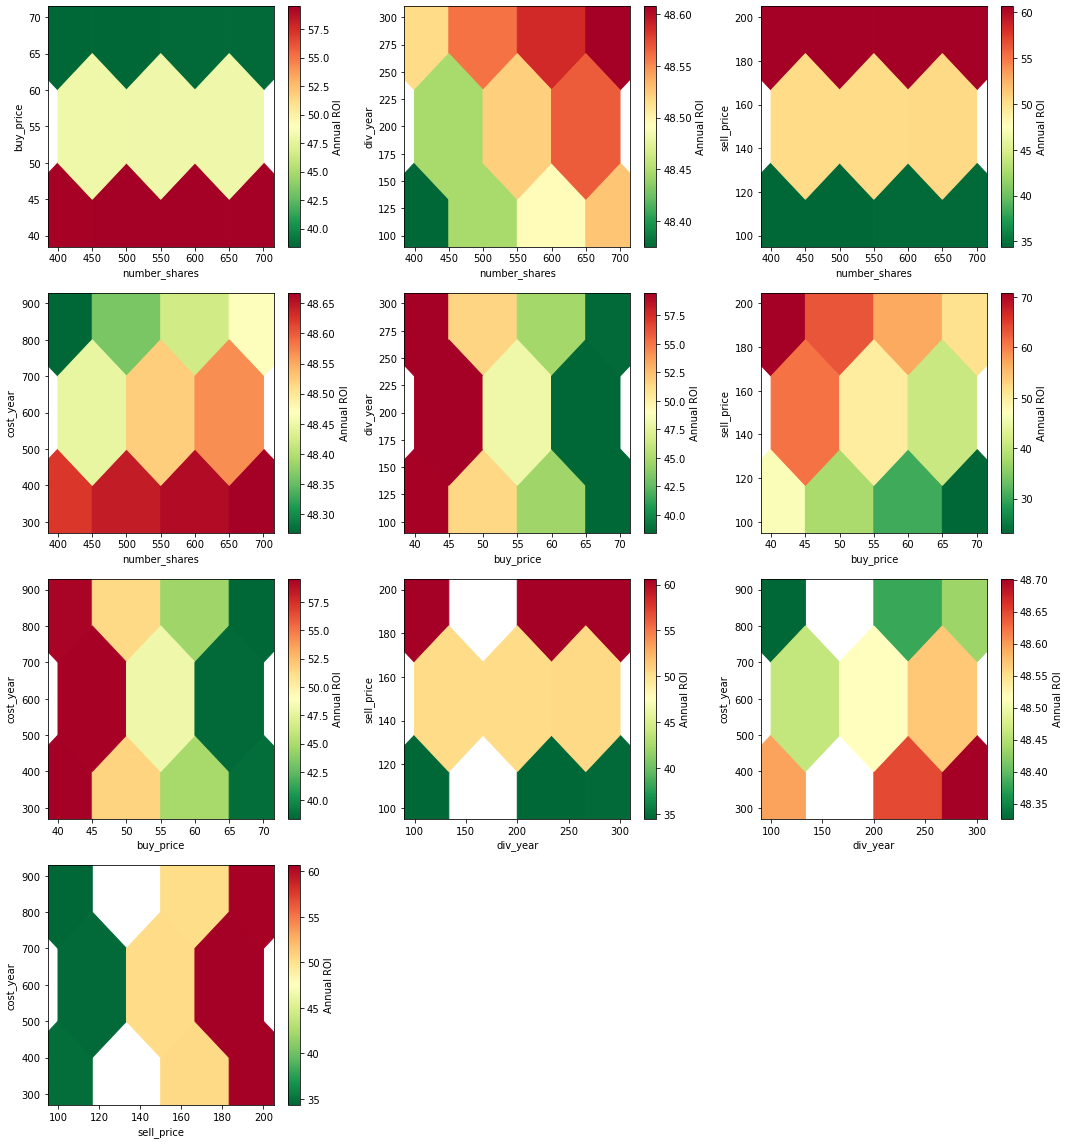

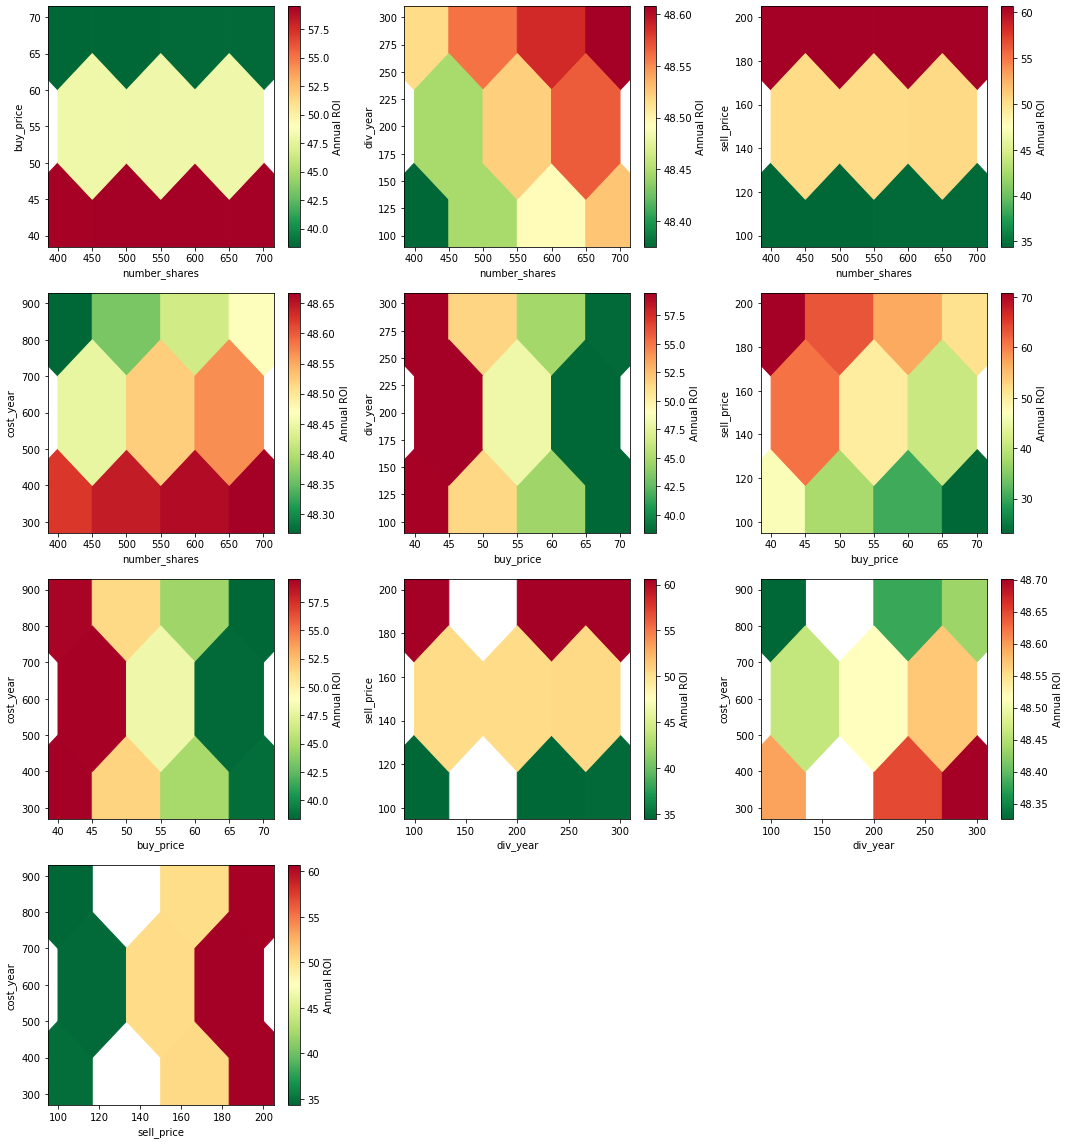

In [46]:
# Create a visualisation.
sa.plot()

In [47]:
# Display results as a DataFrame.
sa.styled_dfs()

,40,50,60,70
number_shares,,,,
400,59.377834,51.397770,44.575337,38.433767
500,59.429600,51.451965,44.633150,38.496772
600,59.464041,51.488012,44.671590,38.538643
700,59.488608,51.513720,44.698998,38.568486


,100,200,300
number_shares,,,
400,48.375409,48.446247,48.516875
500,48.446398,48.502916,48.559302
600,48.493587,48.540602,48.587525
700,48.527228,48.567475,48.607655


,100,150,200
number_shares,,,
400,34.444716,50.318599,60.575216
500,34.530974,50.367414,60.610227
600,34.588275,50.399900,60.633540
700,34.629103,50.423076,60.650179


,300,400,500,600,700,800,900
number_shares,,,,,,,
400,48.657852,48.587640,48.517222,48.446596,48.375761,48.304714,48.233455
500,48.671894,48.615774,48.559522,48.503138,48.446621,48.389970,48.333184
600,48.681248,48.634508,48.587678,48.540756,48.493742,48.446635,48.399435
700,48.687925,48.647880,48.607767,48.567588,48.527341,48.487026,48.446643


,100,200,300
buy_price,,,
40,59.391028,59.440051,59.488984
50,51.411597,51.462903,51.514102
60,44.590105,44.644813,44.699388
70,38.449892,38.509474,38.568885


,100,150,200
buy_price,,,
40,46.499414,60.953265,70.867384
50,38.006390,53.160734,63.221476
60,30.432112,46.593323,56.908871
70,23.255152,40.801668,51.471432


,300,400,500,600,700,800,900
buy_price,,,,,,,
40,59.586728,59.537976,59.489134,59.440202,59.391179,59.342066,59.292860
50,51.616356,51.565371,51.514280,51.463082,51.411776,51.360363,51.308842
60,44.808361,44.754049,44.699607,44.645033,44.590327,44.535488,44.480515
70,38.687474,38.628406,38.569169,38.509761,38.450181,38.390428,38.330500


,100,150,200
div_year,,,
100,34.466825,50.331029,60.584112
200,34.548356,50.377272,60.617303
300,34.629620,50.423440,60.650458


,300,400,500,600,700,800,900
div_year,,,,,,,
100,48.621492,48.568089,48.514561,48.460908,48.407129,48.353222,48.299187
200,48.674771,48.621492,48.568089,48.514561,48.460908,48.407129,48.353222
300,48.727926,48.674771,48.621492,48.568089,48.514561,48.460908,48.407129


,300,400,500,600,700,800,900
sell_price,,,,,,,
100,34.791793,34.711057,34.630060,34.548799,34.467272,34.385477,34.303411
150,50.515676,50.469658,50.423565,50.377397,50.331155,50.284837,50.238444
200,60.716720,60.683637,60.650517,60.617363,60.584172,60.550945,60.517682


{('number_shares',
  'buy_price'): <pandas.io.formats.style.Styler at 0x7f8160d43340>,
 ('number_shares',
  'div_year'): <pandas.io.formats.style.Styler at 0x7f81232636a0>,
 ('number_shares',
  'sell_price'): <pandas.io.formats.style.Styler at 0x7f8123263490>,
 ('number_shares',
  'cost_year'): <pandas.io.formats.style.Styler at 0x7f8123295f40>,
 ('buy_price', 'div_year'): <pandas.io.formats.style.Styler at 0x7f812328e310>,
 ('buy_price',
  'sell_price'): <pandas.io.formats.style.Styler at 0x7f8122f54220>,
 ('buy_price',
  'cost_year'): <pandas.io.formats.style.Styler at 0x7f812326a340>,
 ('div_year',
  'sell_price'): <pandas.io.formats.style.Styler at 0x7f8160cfa850>,
 ('div_year', 'cost_year'): <pandas.io.formats.style.Styler at 0x7f81609b13a0>,
 ('sell_price',
  'cost_year'): <pandas.io.formats.style.Styler at 0x7f812329e1f0>}

In [48]:
@dataclass
class ModelInputs:
    number_shares : int = 600
    buy_price: int = 20
    div_year: int = 800
    sell_price: int = 22
    cost_year: int = 100
        
model_data = ModelInputs()
model_data

ModelInputs(number_shares=600, buy_price=20, div_year=800, sell_price=22, cost_year=100)

In [49]:
def annualized_roi_per_year_for_required_roi(data: ModelInputs):
    year = 0
    prior_roi = 0
    
    for year in range(19):
        year = year + 1        
        net_return = (data.sell_price - data.buy_price) * data.number_shares + data.div_year - data.cost_year
        cost_of_investment = data.buy_price * data.number_shares

        roi = prior_roi + ((net_return)/(cost_of_investment))*100 
        annual_roi = ((1 + (roi/100))**(1/year)-1)*100
        
        prior_roi = roi 
    print(f'The annualized ROI at year {year} reaches {annual_roi}% for total shares of {model_data.number_shares}\
    with a buying price of {model_data.buy_price}, selling price of {model_data.sell_price}')
    
annualized_roi_per_year_for_required_roi(model_data)

The annualized ROI at year 19 reaches 7.580841850996478% for total shares of 600    with a buying price of 20, selling price of 22
